In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [0.1, 0.5, 1.0]
L = 1.0
num_empty = 200
res_dir = 'nsc-setisaturday-numempty200'
randix = 0

succeed nsc-setisaturday-numempty200/D=3_n=3.5_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty200/D=3_n=8.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty200/D=3_n=17.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty200/D=3_n=35.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty200/D=3_n=71.0_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+01_r=0
succeed nsc-setisaturday-numempty200/D=3_n=3.5_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty200/D=3_n=8.0_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty200/D=3_n=17.0_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty200/D=3_n=35.0_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty200/D=3_n=71.0_N=1.00e+08_s=1.0_L=1.0_c=2.00000e+00_r=0
succeed nsc-setisaturday-numempty200/D=3_n=3.5_N=1.00e+08_s=1.0_L=1.0_c=1.00000e+00_r=0
succeed nsc-setisaturday-n

<ipython-input-7-fe27375b4a6b>:76: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(-0.04, 1.04)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

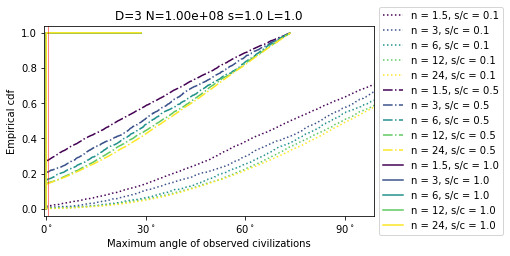

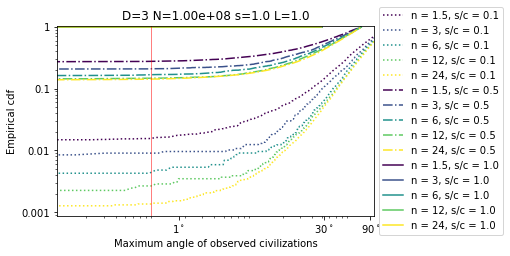

In [7]:
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = [':', '-.', '-']
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        fout = (
            f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
            f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
        )
        res = pd.read_csv(fout+'.csv')
        fig = plt.figure()
        (counts, bins, patches) = plt.hist(
            res.MaxAngle, cumulative=True, histtype='step', density=True, bins=res.shape[0])
        fig.clf()
        plot_data[(true_n, sc)] = (bins[0:-1], counts)
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
#leg = [f"n = {nn}" for nn in true_nlist]
plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.plot([0.009, 0.009], [-0.05, 1.05],'r', linewidth=0.5);
ax.set_position([0.1,0.1,0.5,0.8])
plt.gca().set_ylabel('Empirical cdf')
plt.gca().set_xlabel('Maximum angle of observed civilizations');
plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
#plt.gca().set_xscale('log')
plt.gca().set_xticks([0, 0.5*math.pi*(1/3), 0.5*math.pi*(2/3), 0.5*math.pi*(3/3)]);
plt.gca().set_xticklabels(['0$^\circ$', '30$^\circ$', '60$^\circ$', '90$^\circ$']);
plt.gca().set_ylim(-0.04, 1.04)
plt.gca().set_xlim(-0.01, 0.5*math.pi*(3/3)*1.1)
plt.tight_layout(rect=(0, 0.05, 0.7, 1))
fig.savefig('figures-friday/plotG.png', dpi=200)

fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]
        #plt.step(bins, counts, scstyles[scix], color=mycols[nix], where='post')
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
#leg = [f"n = {nn}" for nn in true_nlist]
plt.legend(leg, loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.plot([0.009, 0.009], [-0.05, 1.05],'r', linewidth=0.5);
ax.set_position([0.1,0.1,0.5,0.8])
plt.gca().set_ylabel('Empirical cdf')
plt.gca().set_xlabel('Maximum angle of observed civilizations');
plt.gca().set_title(f'D={D} N={N:.2e} s={s:.1f} L={L:.1f}');
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xticks([0, 0.5*math.pi*(1/90), 0.5*math.pi*(1/3),0.5*math.pi*(3/3)]);
plt.gca().set_xticklabels(['0$^\circ$', '1$^\circ$','30$^\circ$', '90$^\circ$']);
plt.gca().set_ylim(-0.04, 1.04)
plt.gca().set_yticks([1e-3, 1e-2, 1e-1, 1])
plt.gca().set_yticklabels([1e-3, 1e-2, 1e-1, 1])
plt.gca().set_xlim(1e-3, 0.5*math.pi*(3/3)*1.1)
plt.tight_layout(rect=(0, 0.05, 0.7, 1))

fig.savefig('figures-friday/plotG-loglog.png', dpi=200)